In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [2]:
py.offline.init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

In [4]:
# Importing the dataset
df= pd.read_csv('Capacity_Planning.csv')
type(df)
df.head()
df


,Timestamp,Values
0,12/20/2019,2000
1,12/21/2019,1997
2,12/22/2019,1994
3,12/23/2019,10
4,12/24/2019,8500
5,12/25/2019,10000
6,12/26/2019,20
7,12/27/2019,120
8,12/28/2019,5000
9,12/29/2019,4500


In [5]:
df.iplot()

In [10]:
df1 = df.reset_index()['Values']
df1
type(df1)


0    2000
1    1997
2    1994
3      10
4    8500
Name: Values, dtype: int64

In [11]:
df1 = pd.DataFrame({'Numbers':df1.index, 'values':df1.values})
df1.head()

,Numbers,values
0,0,2000
1,1,1997
2,2,1994
3,3,10
4,4,8500


In [15]:
df1.iplot(mode = 'markers', size = 25)

In [16]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, 1].values


In [20]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [24]:
cf.set_config_file(theme='polar')
df1.iplot(kind = 'bar', bargap=0.5)

In [27]:
df.iplot(kind = 'barh', barmode='stack', bargap=0.5)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [18]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\Shubham Buchunde\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

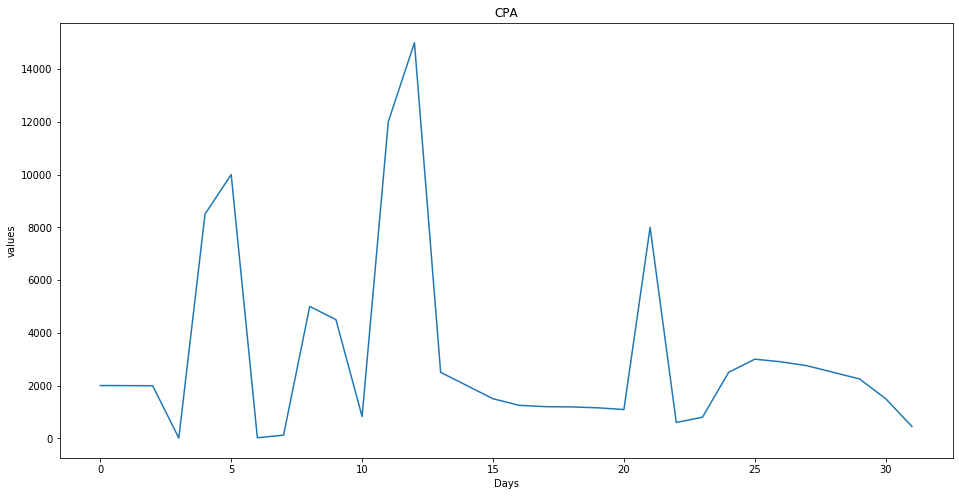

In [19]:
# Visualize the dataset
plt.figure(figsize=(16,8))
plt.title('CPA')
plt.xlabel('Days')
plt.ylabel('values')
plt.plot(df['Values'])
plt.show()


In [28]:
# Predicting the Test set results
y_pred = regressor.predict(X)

In [29]:
y_pred = sc_y.inverse_transform(y_pred)


In [30]:
xtest=pd.Series([tx for tx in range(33,64)])
type(xtest)


pandas.core.series.Series

In [31]:
testDF = pd.DataFrame({'Fdays':xtest.index})

In [32]:
zz = testDF.iloc[:,:].values
zz = sc_X.fit_transform(zz)
y_pred1= regressor.predict(zz)
y_pred1 = sc_y.inverse_transform(y_pred1)

In [36]:
numpy_data = y_pred1
Future_result= pd.DataFrame(data=numpy_data, columns=["output"])
type(numpy_data)
Future_result


,output
0,1741.932437
1,2033.746189
2,2379.698537
3,2758.611946
4,3141.670337
5,3494.885236
6,3782.783530
7,3972.907655
8,4040.502086
9,3972.633002


In [37]:
Future_result.iplot()

In [38]:
Future_result.iplot(mode = 'markers', size = 25)

In [39]:
Future_result.iplot(kind = 'bar', barmode='stack', bargap=0.5)

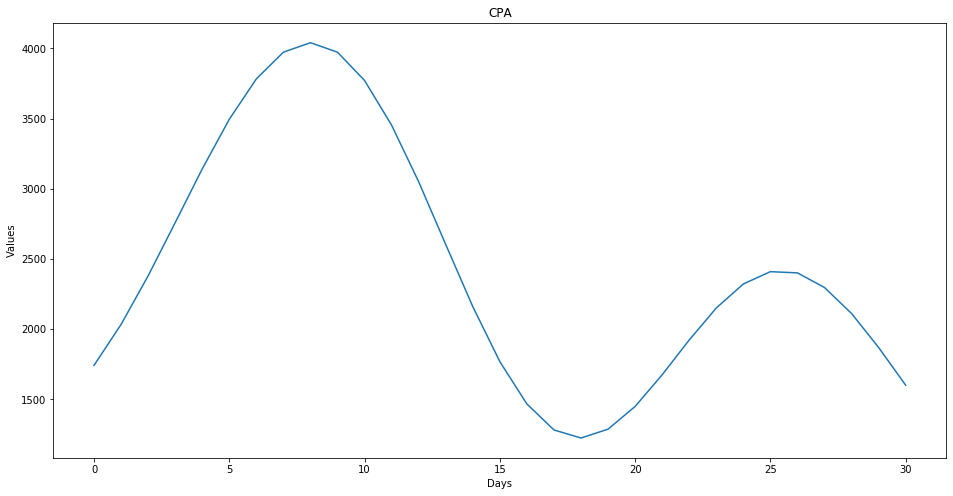

In [40]:
# Visualize the Result dataset
plt.figure(figsize=(16,8))
plt.title('CPA')
plt.xlabel('Days')
plt.ylabel('Values')
plt.plot(Future_result['output'])
plt.show()

In [35]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X, y)))


Coefficient of determination R^2 <-- on train set: 0.08070802747412065


In [41]:
## Hyper Parameter Optimization

params={
 "kernel"    : ["linear", "poly", "rbf", "sigmoid"] ,
 "gamma"     : [ "scale", "auto"]
}


In [42]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV


In [43]:
random_search=GridSearchCV(regressor,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.8s finished
C:\Users\Shubham Buchunde\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

C:\Users\Shubham Buchunde\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [44]:
predictions=random_search.predict(zz)
predictions = sc_y.inverse_transform(predictions)


In [45]:
numpy_data = predictions
Future_result= pd.DataFrame(data=numpy_data, columns=["output"])

type(numpy_data)

numpy.ndarray

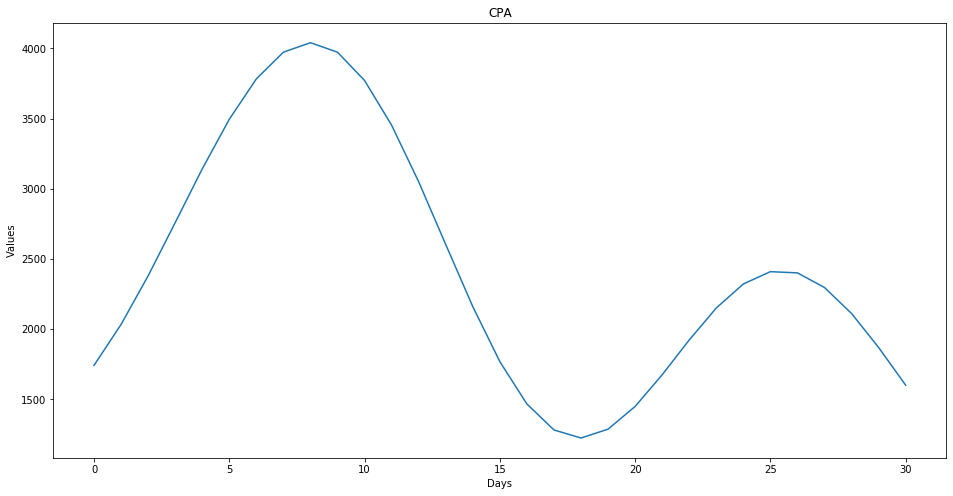

In [46]:
# Visualize the future dataset
plt.figure(figsize=(16,8))
plt.title('CPA')
plt.xlabel('Days')
plt.ylabel('Values')
plt.plot(Future_result['output'])
plt.show()

In [47]:
Future_result.iplot(kind = 'bar', barmode='stack', bargap=0.5)